In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
N = 443
train = pd.read_csv("input.txt", sep="\t")

In [3]:
train.head()

,yyyy,month,tmax,tmin
0,1908,January,5.0,-1.4
1,1908,February,7.3,1.9
2,1908,March,6.2,0.3
3,1908,April,Missing_1,2.1
4,1908,May,Missing_2,7.7


In [4]:
for i in range(10):
    if(train.tmax[i].__contains__("Missing")):
        print("yes ", i)

yes  3
yes  4
yes  6


In [5]:
train["tmax"] = pd.to_numeric(train["tmax"], errors='coerce')
train["tmin"] = pd.to_numeric(train["tmin"], errors='coerce')

In [21]:
# at what index do we need to predict=
tmin_miss = train["tmin"].isna()
tmax_miss = train["tmax"].isna()

In [22]:
train.loc[tmin_miss].head()

,yyyy,month,tmax,tmin
11,1908,December,5.8,NaN
26,1910,March,9.1,NaN
28,1910,May,14.3,NaN
36,1911,January,5.8,NaN
43,1911,August,21.6,NaN


In [23]:
train.loc[tmax_miss].head()

,yyyy,month,tmax,tmin
3,1908,April,NaN,2.1
4,1908,May,NaN,7.7
6,1908,July,NaN,11.0
25,1910,February,NaN,1.5
48,1912,January,NaN,0.1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc21973d68>,
      dtype=object)

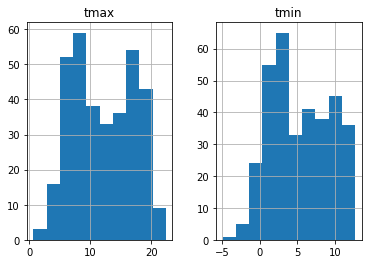

In [107]:
train.loc[~(tmin_miss | tmax_miss),["tmax","tmin"]].hist()

In [26]:
X1_train = np.array(train[~tmin_miss].index)
X1_train = X1_train.reshape(X1_train.shape[0],1)
y1_train = np.array(train.tmin[~tmin_miss],dtype="float")

X1_test = np.array(train[tmin_miss].index)
X1_test = X1_test.reshape(X1_test.shape[0],1)
y1_test = np.array(train.tmin[tmin_miss],dtype="float")

In [27]:
X2_train = np.array(train[~tmax_miss].index)
X2_train = X2_train.reshape(X2_train.shape[0],1)
y2_train = np.array(train.tmax[~tmax_miss],dtype="float")

X2_test = np.array(train[tmin_miss].index)
X2_test = X2_test.reshape(X2_test.shape[0],1)
y2_test = np.array(train.tmin[tmin_miss],dtype="float")

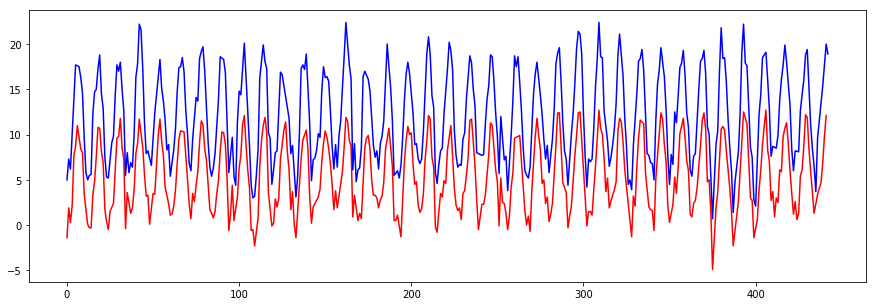

In [28]:
plt.figure(figsize=[15,5])
plt.plot(X1_train,y1_train,'r-')
plt.plot(X2_train,y2_train,'b-')

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

/home/robin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
model_min = RandomForestRegressor(random_state=0)
model_max = RandomForestRegressor(random_state=0)

In [30]:
model_min.fit(X1_train,y1_train)
model_max.fit(X2_train,y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
y1_pred = model_min.predict(X1_test)
y2_pred = model_max.predict(X2_test)

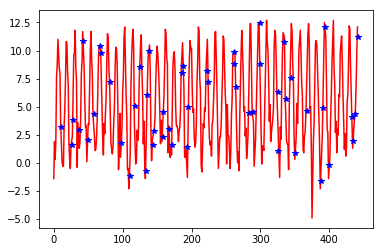

In [32]:
plt.plot(X1_train,y1_train,'r-')
plt.plot(X1_test, y1_pred, 'b*')

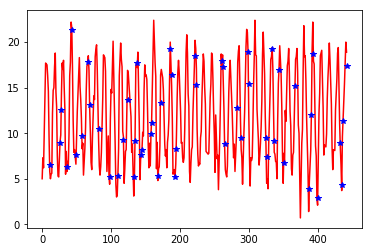

In [33]:
plt.plot(X2_train,y2_train,'r-')
plt.plot(X2_test, y2_pred, 'b*')

In [34]:
msng = list()
# find the ordering of the missing data
for i in range(train.shape[0]):
    if(np.isnan(train.tmax[i]) | np.isnan(train.tmin[i])):
        msng.append(i)

In [35]:
np.any(train.tmin[tmin_miss].index, ind)


NameError: name 'ind' is not defined

In [36]:
msng_adj = [x - 1 for x in msng]

In [37]:
train.tmin[tmin_miss].index

Int64Index([ 11,  26,  28,  36,  43,  49,  58,  67,  69,  82,  98, 110, 118,
            125, 134, 135, 138, 144, 145, 158, 159, 168, 172, 186, 188, 193,
            195, 222, 224, 261, 262, 265, 283, 289, 299, 300, 325, 326, 334,
            337, 344, 351, 367, 388, 391, 394, 400, 433, 435, 437, 442],
           dtype='int64')

In [38]:
train.tmax[tmax_miss].index

Int64Index([  3,   4,   6,  25,  48,  50,  52,  53,  61,  74,  81,  90,  93,
             95, 102, 104, 105, 113, 123, 126, 127, 128, 132, 140, 163, 174,
            177, 185, 191, 200, 220, 233, 239, 240, 253, 257, 270, 274, 292,
            313, 322, 330, 346, 366, 376, 389, 396, 411, 424],
           dtype='int64')

In [39]:
np.isin(msng[3], train.tmin[tmin_miss].index)


array(True)

In [40]:
output = list()
j_min = 0
j_max = 0
for ind in msng:
    if(np.isin(ind, train.tmin[tmin_miss].index)):
        output.append(y1_pred[j_min])
        #print(y1_pred[j_min])
        j_min += 1
    
    if(np.isin(ind, train.tmax[tmax_miss].index)):
        output.append(y2_pred[j_max])
        #print(y2_pred[j_max])
        j_max += 1


In [41]:
y_test = pd.read_csv("label.txt", header=None, names = ["value"])

In [42]:
y_test.head()

,value
0,8.6
1,15.8
2,18.9
3,0.0
4,7.0


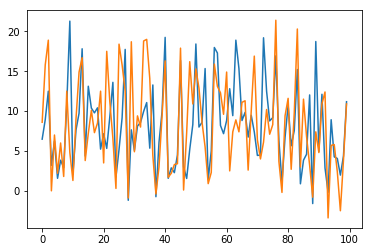

In [85]:
plt.plot(output)
plt.plot(y_test)

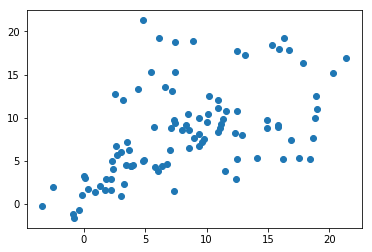

In [48]:
plt.scatter(y_test,output)

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(y_test,output)

28.719739

# now test doing fitting to the linearity between tmin and tmax!

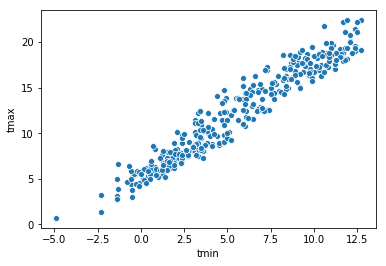

In [65]:
sns.scatterplot(y = "tmax", x = "tmin", data = train.loc[~(tmin_miss & tmax_miss),:])
pass

In [197]:
X_min = np.array(train.tmin[~(tmin_miss | tmax_miss)])
X_min_train = X_min.reshape(X_min.shape[0],1)
# all tmin where we don't have tmax
X_min_test = np.array(train.tmin[tmax_miss])
X_min_test = X_min_test.reshape(X_min_test.shape[0],1)


X_max = np.array(train.tmax[~(tmin_miss | tmax_miss)])
X_max_train = y_max.reshape(y_max.shape[0],1)
# all tmax where we don't have tmin
X_max_test = np.array(train.tmax[tmin_miss])
X_max_test = X_max_test.reshape(X_max_test.shape[0],1)


In [52]:
from sklearn.svm import SVR

In [222]:
model_lin_min = SVR(kernel="linear")
model_lin_max = SVR(kernel="linear")

In [220]:
model_lin_min.fit(X_max_train,X_min_train)
model_lin_max.fit(X_min_train,X_max_train)

/home/robin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/robin/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

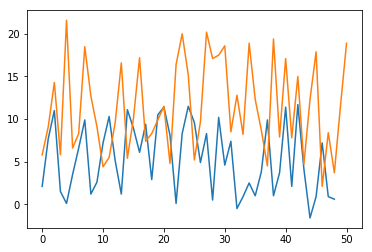

In [221]:
plt.plot(X_min_test)
plt.plot(X_max_test)

In [201]:
lin_min_pred = model_lin_min.predict(X_max_test)
lin_max_pred = model_lin_max.predict(X_min_test)

In [203]:
lin_max_pred.mean()

11.769382065423558

In [204]:
train.tmin[tmin_miss].shape

(51,)

In [205]:
X_min_test.shape

(49, 1)

In [206]:
lin_min_pred.shape

(51,)

In [215]:
output_lin = list()
j_min = 0
j_max = 0
for ind in msng:
    if(np.isin(ind, train.tmin[tmin_miss].index)):
        output_lin.append(lin_min_pred[j_min])
        #print(y1_pred[j_min])
        j_min += 1
    
    if(np.isin(ind, train.tmax[tmax_miss].index)):
        output_lin.append(lin_max_pred[j_max])
        #print(y2_pred[j_max])
        j_max += 1

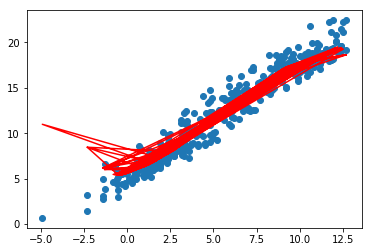

In [214]:
plt.scatter(X_min,X_max)
plt.plot(X_min, model_lin_max.predict(X_min_train), color="red")

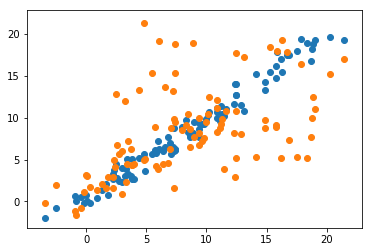

In [216]:
plt.scatter(y_test, output_lin)
plt.scatter(y_test, output)
#plt.plot(y_test)

In [217]:
mean_squared_error(y_test,output_lin)

0.965005950672585

# conclusion, use the linearity between tmin and tmax!